In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
df_diabetes=pd.DataFrame(dataset['data'],columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X=df_diabetes
y=dataset['target']

In [10]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [11]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [12]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

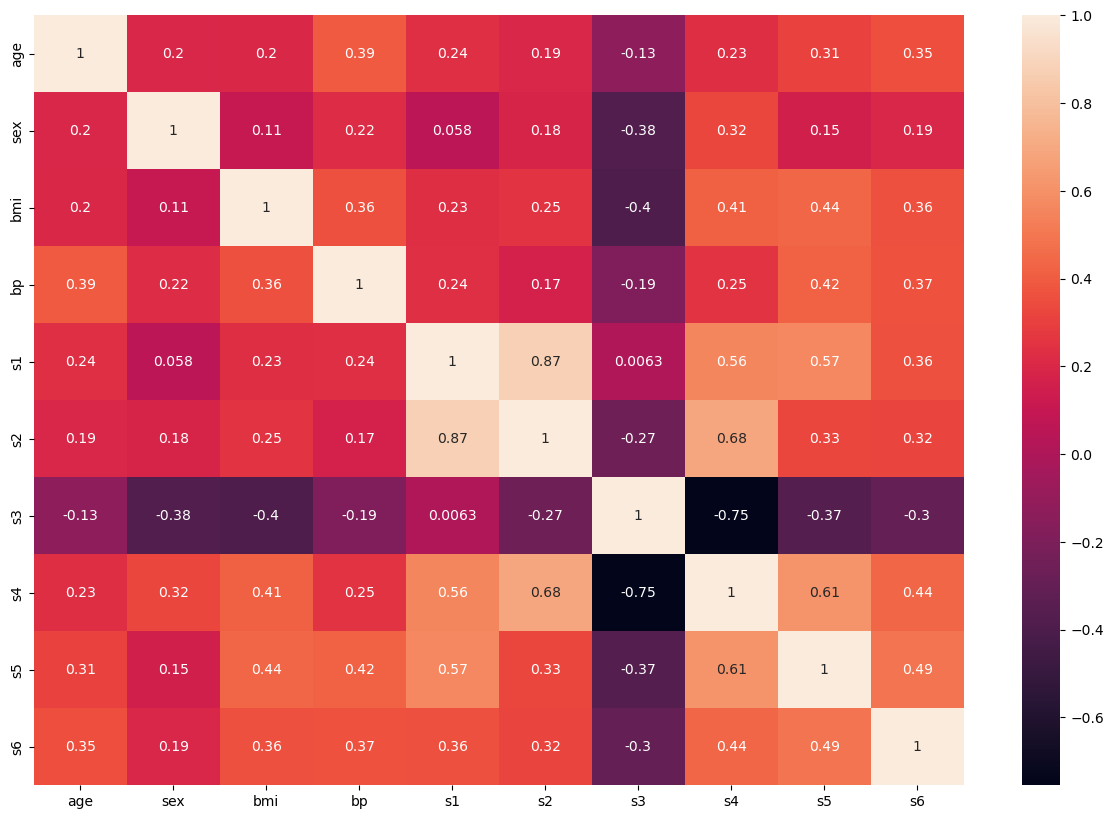

In [13]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [30]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [33]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [34]:
y_pred=grid.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2450893558726619
57.53450702438478
4776.826262175648


In [37]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [39]:
selectedmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[7] <= 0.005\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[2] <= 0.052\nfriedman_mse = 4999.833\nsamples = 195\nvalue = 130.831'),
 Text(0.125, 0.5, 'x[5] <= -0.01\nfriedman_mse = 4065.28\nsamples = 175\nvalue = 122.646'),
 Text(0.0625, 0.3, 'x[2] <= -0.046\nfriedman_mse = 4356.303\nsamples = 106\nvalue = 125.868'),
 Text(0.03125, 0.1, 'friedman_mse = 1647.583\nsamples = 36\nvalue = 92.167'),
 Text(0.09375, 0.1, 'friedman_mse = 4864.846\nsamples = 70\nvalue = 143.2'),
 Text(0.1875, 0.3, 'x[2] <= -0.008\nfriedman_mse = 3577.748\nsamples = 69\nvalue = 117.696'),
 Text(0.15625, 0.1, 'friedman_mse = 1601.327\nsamples = 40\nvalue = 93.65'),
 Text(0.21875, 0.1, 'friedman_mse = 4406.326\nsamples = 29\nvalue = 150.862'),
 Text(0.375, 0.5, 'x[2] <= 0.082\nfriedman_mse = 7461.648\nsamples = 20\nvalue = 202.45'),
 Text(0.3125, 0.3, 'x[6] <= 0.026\nfriedman_mse = 6147.067\nsamples = 15\nvalue = 173.0'),
 Text(0.28125, 0.1, 'friedman_mse = 6310.63

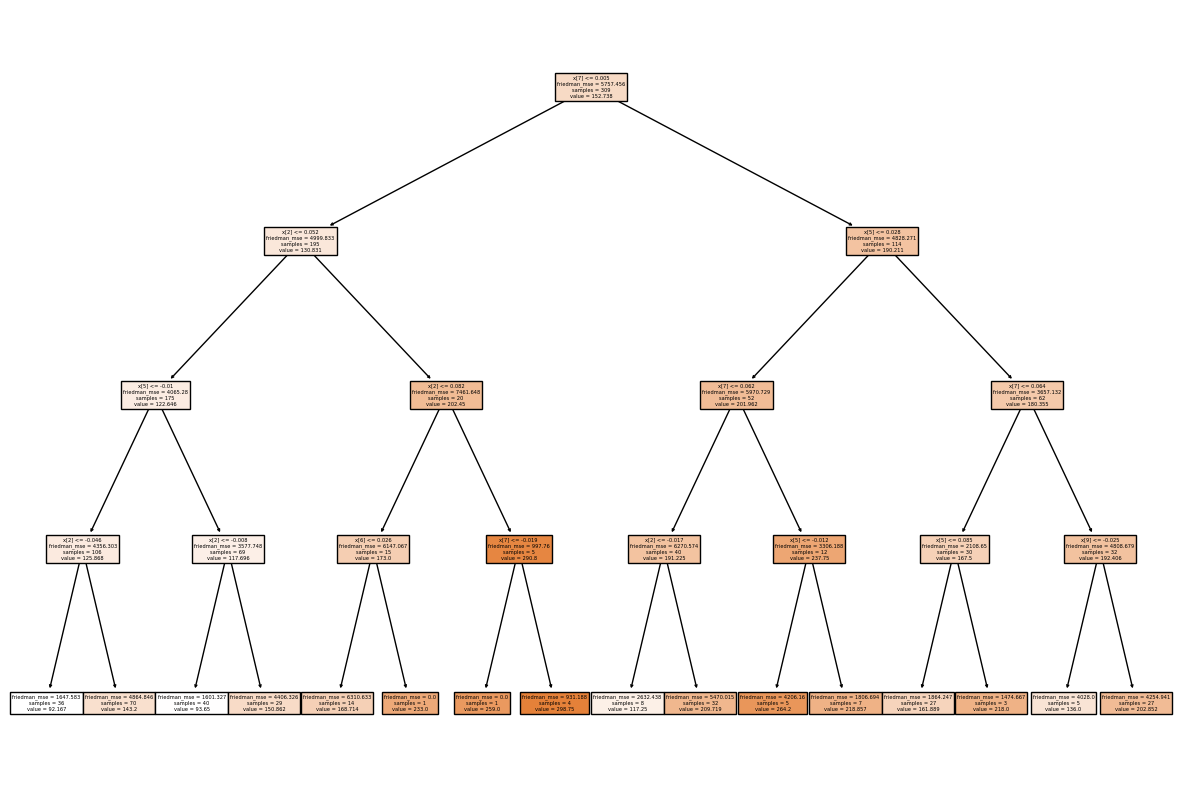

In [40]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)